# Visualziation

In [10]:
# Import useful libraries

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
from shapely.geometry import Point

In [11]:
# Histograms for 5 independend variables
# file path
file_path = 'C:\\Users\\MSI\\Documents\\Clone_1\\Assignment-1\\Hackathon\\csv\\MergedData.csv'

# read the .csv  file
dataset = pd.read_csv(file_path)

# check the dataset
dataset.head()

,Unnamed: 0,OBJECTNUMMER,CBS_Wijkcode,Area code,Area,Rent: average,Average house-value for tax purposes,Area public green (ha),Parking spots total,Mean disposable household income,Most vulnerable (%),Safety index: High Impact Crime,geometry,LNG,LAT,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2
0,0,1.0,BU0363EQ,EQ,Da Costabuurt,823,498536,0.68,971.0,49800,52.0,130,"POLYGON ((4.867406 52.371797, 4.869586 52.3686...",4.872108,52.370130,GE05,"Oud-West, De Baarsjes",E,West,257542.0
1,1,2.0,BU0363ER,ER,Westindische Buurt,861,443995,2.01,1763.0,50500,54.0,89,"POLYGON ((4.848885 52.358045, 4.848892 52.3579...",4.854062,52.361007,GE05,"Oud-West, De Baarsjes",E,West,345503.0
2,2,3.0,BU0363KB,KB,Schinkelbuurt,774,445304,1.8,972.0,46200,51.0,104,"POLYGON ((4.848181 52.342768, 4.849791 52.3429...",4.852877,52.349646,GK11,Oud-Zuid,K,Zuid,344932.0
3,3,4.0,BU0363KC,KC,Willemspark,1349,1064407,16.38,2624.0,131700,55.0,51,"POLYGON ((4.855085 52.35641, 4.855027 52.35632...",4.862796,52.354371,GK11,Oud-Zuid,K,Zuid,695818.0
4,4,5.0,BU0363KD,KD,Museumkwartier,1051,1011630,17.53,4839.0,103000,55.0,219,"POLYGON ((4.86554 52.358854, 4.867135 52.35610...",4.876464,52.355265,GK11,Oud-Zuid,K,Zuid,1380178.0


In [12]:
#choosing the columns we wan tto include in histogram

numeric_data = dataset[['Rent: average', 'Public Space', 'Parking spots total', 'Mean disposable household income', 'Most vulnerable (%)', 'Safety index: High Impact Crime']]


KeyError: "['Rent Average', 'Public Space'] not in index"

In [ ]:
#
sns.histplot(numeric_data['Electorate'], kde=True)

In [ ]:
#
a = sns.displot(numeric_data, kde=False, rug=True)

In [ ]:
#
b = sns.kdeplot(numeric_data, fill=True)

<Axes: >

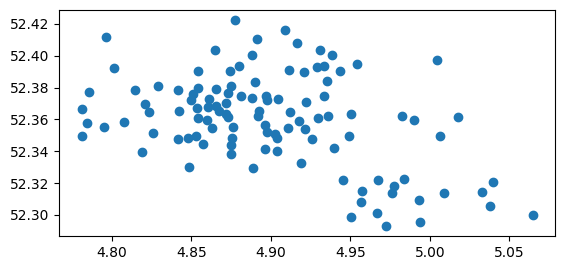

In [4]:
# plotting Amsterdam Map
Ams_df = pd.read_csv('C:\\Users\\MSI\\Documents\\Geometry of Wijks.csv')

# loading longitude(LNG), and latitude(LAT) columns
geometry = [Point(xy) for xy in zip(Ams_df['LNG'], Ams_df['LAT'])]

# Converting to GeoDataFrame
gdf = gpd.GeoDataFrame(Ams_df, geometry=geometry)

# Plotting the map
gdf.plot()

In [ ]:

# Choropleth Map
# path to .csv file
csv_file_path = r'sdfghjkjhgfds.csv'

# reading the dataframe
df = pd.read_csv(csv_file_path)
\
# display dataframe
df


In [ ]:
# using geopandas to convert long to lat to points
df_gp = gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.longitude, df.latitude))

df_gp

In [ ]:
# getting built in dataset from geo pandas
amsterdam_data = gpd.read_csv(gpd.datasets.get_path('naturalearth_lowres'))

# Set up figure and axis
f, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,2,3,4,5, figsize=(8, 8)) # 5graphs, index=1, columns=5

# Plot '% to leave' and 'Valid_Vote'
# First plot: '% to Leave'
dataset.plot(column=' Column name', scheme='Quantiles', legend=True, ax=ax1)
ax1.set_title('title of the column')

# remove axis frame
ax1.set_axis_off()

# Add background map
ctx.add_basemap(ax1, crs=dataset.crs)

# Second plot: 'Valid_Vote'
dataset.plot(column='Valid_Vote', cmap='plasma', legend=True, ax=ax2, 
             legend_kwds={
                 'shrink': 0.2, 'fraction': 0.1,  # the size of colorbar: 20%
                 'label': "Number",  # Add legend to colorbar
                 'orientation': "vertical",  # or set 'horizontal'
                 'aspect': 50 # aspect ratio
         })
ax2.set_title('Valid_Vote')
# ax2.set_axis_off()
# Add background map
# ctx.add_basemap(ax2, crs=dataset.crs)

# Title
f.suptitle('Title_Name', size=30)
# Change background color of the figure
f.set_facecolor('0.75')

# Adjust layout
plt.tight_layout()
# Draw
plt.show()